# Академия Аналитиков Авито

# Эконометрика

- Про эконометрику как науку.
    - "Основная задача эконометрики - наполнить эмпирическим содержанием априорные экономические рассуждения" (Клейн Л.).
    - "Цель эконометрики - эмпирический вывод экономических законов. Эконометрика дополняет теорию, используя реальные данные для проверки и уточнения постулируемых отношений" (Маленво Э.).
    - В целом, эконометрика - это некий набор инструментов, благодаря которым исследователь может проверить свои гипотезы и/или теории.
    - У нее много различных сфер применения: начиная от исследования социологических (и не только) опросов и заканчивая высокочастотной торговлей

Литеатура и полезные ссылки:
- https://www.coursera.org/learn/ekonometrika
- Я. Магнус, П. Катышев, А. Пересецкий. Эконометрика. Начальный курс (8-е издание). М.: Дело, 2007
- Вербик М. Путеводитель по современной эконометрике. М., «Научная книга», 2008
- Доугерти К. Введение в эконометрику (издание 3). М., ИНФРА-М, 2010
- D. Gujarati. Basic econometrics (4-th edition). McGraw-Hill, 2003
- Angrist, Joshua D., and Jörn-Steffen Pischke. Mostly harmless econometrics: An empiricist's companion. Princeton university press, 2009.
- https://mlcourse.ai/

# Занятие №1

## План
- Повторение теории вероятности и математической статистики
- Операции с матрицами
- Пакеты *NumPy*, *SciPy* и *MatPlotLib*

## Повторение теории вероятности и математической статистики

#### Теоретические и эмпирические моменты

- Нас с вами в рамках данного курса будут интересовать два типа моментов: начальный и центральный момент
- Определение:
    - Если дана некая случайня величина (с.в.) $Х$ (определенная на некотором вероятностном пространстве), то 
        - k-м **начальным** моментом этой с.в., где $k \in N$ называется величина: $E[X^{k}]$
        - k-м **центральным** моментом этой с.в., где $k \in N$ называется величина: $E[(X - E[X])^{k}]$

- Думаю, очевидно, что математическое ожидание является первым начальным моментом, а дисперсия - вторым центральным моментом.

- Однако, то, что мы с вами определили выше, это теоретические моменты.
- Естественно, когда у вас есть реальные данные, те моменты, которые вы считаются не теоретическими, а **выборочными (эмпирическими)**
- Другими словами, аналогом для математического ожидания является простое среднее: $\bar{X} = \frac{1}{N} \cdot \sum_{i=1}^{N}X_{i} $
- Для дисперсии же: $\sigma^{2} = \frac{1}{N} \cdot \sum_{i=1}^{N} (X_{i} - \bar{X})^{2}$ (не забывайте, что это смещенная оценка дисперсии, которая все же иногда используется. **А как будет выглядеть несмещенная оценка дисперсии?**)

- Нам с вами это пригодится, чтобы:
    - Понимать, может ли наша модель потенциально быть "хорошей" с увеличением числа наблюдений 
    - Как мы можем посчитать на фактических данных то, что у нас получилось в теории
- Про связь теоретических и выборочных моментов можете почитать здесь: [Закон Больших Чисел (ЗБЧ)](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB)
P.S. На самом деле [ЗБЧ все не ограничивается](https://nsu.ru/mmf/tvims/chernova/ms/lec/node6.html), но не будем об этом

#### Основные свойства математического ожидания и дисперсии

1. $E[X] = \sum_{i=1}^{N} p_{i}\cdot X_{i}$, где $p_{i}$ - вероятность того, что $X = X_{i}$
2. $var(X) = E[(X - E[X])^2]$
3. $E[aX \pm bY \pm c] = aE[X] \pm bE[Y] \pm c$
4. $var[aX \pm bY \pm c] = a^{2}var(X) + b^{2}var(Y) \pm 2ab \cdot cov(X, Y)$

- Мы с вами не разобрали, что такое $cov(X, Y)$
- То, что мы обсудили ранее, является характеристикой одной с.в., но, очевидно, что с.в. может быть несколько. Более того, одна с.в. может иметь взаимосвязь с другой
- Для того, чтобы это как-то описать количественно и используется ковариация
$$ cov(X, Y) = E[(X-E[X])(Y-E[Y])] $$
- Свойства ковариации:
$$cov(aX \pm c, bY \pm d) = ab\cdot cov(X, Y)$$
- Корреляция и ковариация:
$$corr(X, Y) = \frac{cov(X, Y)}{\sigma_{X} \cdot \sigma_{Y}}$$

#### Пример

- Пример, связанный с Центральной Предельной Теоремой [ЦПТ](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0)
- Допустим, у нас есть с.в. $X \sim N(\mu, \sigma^{2})$
- Как мы с вами знаем, если из с.в. вычести математическое ожидание и поделить на корень из дисперсии (стандартное отклонение), то у нас получится стандартная нормальная с.в., т.е. с нулевым математическим ожиданием и единичной дисперсией (конечно, если будут выполняться предпосылки ЦПТ)
- Давайте предположим, что предпосылки ЦПТ выполняются, и докажем, что если из с.в. **Х**, определенной выше, вычесть математическое ожидание и поделить на стандартное отклонение, то мы получим новую с.в. **Z** (в будущем, я всегда буду обозначать в качестве **Z** стандартную нормальную с.в.), у которой нулевое математическое ожидание и единичная дисперсия

- Итак, наша новая с.в. **Z** равна:
$$Z = \frac{X - \mu}{\sigma}$$
- Посчитаем математическое ожидание:
$$E[Z] = E[\frac{X - \mu}{\sigma}] = \frac{1}{\sigma} \cdot E[X - \mu] = \frac{1}{\sigma} \cdot (E[X] - \mu) = \frac{1}{\sigma} \cdot (\mu - \mu) = 0$$
- Посчитаем дисперсию:
$$var(Z) = var(\frac{X - \mu}{\sigma}) = \frac{1}{\sigma^{2}} \cdot var(X - \mu) = \frac{1}{\sigma^{2}} \cdot var(X) = \frac{1}{\sigma^{2}} \cdot \sigma^{2} = 1$$

##### Давайте теперь вы попробуете посчитать математическое ожидание и дисперсию:  

- $\frac{X - \sigma^{2}}{\mu}$
- $\frac{X - \sigma}{\mu - \sigma}$

- Продолжим делать примеры.
- Допустим вы хотите купить шоколадный батончик. Вы знаете, что в среднем он весит 50 грамм. В среднем вес батончика отклоняется от этого значения на 2 грамма. Вы также знаете, что завод, который производит эти батончики помешан на нормальном распределении и следит за распределением веса произведенных батончиков.
- Вам интересно, какова вероятность того, что вес батончика будет больше 55 грамм

- Пока что мы не будем считать саму вероятность. Посчитаем ее с помощью пакетов чуть дальше.
- Сейчас же давайте приведем те данные, которые получили к нормальному стандартному виду

- Как и ранее, давайте сначала найдем нормальную стандартную величину:
$$Z = \frac{X - 50}{2}$$
- Нам с вами надо найти:
$$P(X \geq 55) = P(\frac{X - 50}{2} \geq \frac{55 - 50}{2}) = P(Z \geq 2.5) = 1 - \Phi(2.5) $$  
Где $\Phi(.)$ - функция распределения нормальной стандартной величины

#### Основные распределения
- Я предполагаю, что с нормальным распределением вы очень хорошо знакомы после курса по статистике
- В этом же разделе давайте поговорим про распределение Стьюдента, хи-квадрат распределение и распределение Фишера
- Нам с вами они очень пригодятся для тестирования гипотез 

- Я не могу не дать формулу (функции плотности) для нормального распределения
$$f(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} \cdot exp\left(-\frac{1}{2} \cdot \frac{(X - \mu)^{2}}{\sigma^{2}}\right)$$
- Хи-квадрат распределение:
    - Пусть $Z_{i} \sim N(0, 1) \text{ и } Z_{i} \text{ независимы}$
    - Тогда $\sum_{i=1}^{N} Z_{i}^{2} = \chi^{2}_{N}$
- Распределение Стьюдента:
    - Пусть $Z \text{ и } \chi^{2}_{N} \text{ независимы}$
    - Тогда $t_{N} = \frac{Z}{\sqrt{\chi^{2}_{N}/N}}$
- Распределение Фишера:
    - Пусть $\chi^{2}_{N} \text{ и } \chi^{2}_{M} \text{ независимы}$
    - Тогда $F_{N, M} = \frac{\chi^{2}_{N}/N}{\chi^{2}_{M}/M}$

## Пакеты NumPy, SciPy, MatPlotLib

- В общем, мы с вами что-то повторили из теории вероятности и математической статистики
- Хотелось бы это все как-то преобразовать в код
- А займемся мы именно функциями распределения, ибо все остальное это просто операции сложения и деления (думаю, вы сможете посчитать среднее в питоне)

- Небольшой дисклеймер (предупреждение)
    - Данное занятие написано человеком, который не любит питон.
    - Этот человек всегда использовал `R` для своих статистических, эконометрических или любых других вычислительных задач.

- Библиотека [*NumPy*](https://numpy.org/doc/stable/user/index.html) является одной из основных для научных вычислений: [объявление векторов и матриц, операции с ними, генератор случайных величин и т.д.](https://numpy.org/doc/stable/reference/index.html)
- Более того, эта библиотека [очень быстрая](https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347)

- Второй библиотекой, с которой вы должны быть знакомы, является [*SciPy*](https://docs.scipy.org/doc/scipy/reference/)
- Если просто, то это библиотека для питона, которая вобрала в себя огромный пласт статистических функций и не только
- Нас с вами больше всего будет волновать раздел [`stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- В этом разделе есть несколько методов, которые нас с вами должны интересовать:
    - `pdf` - probability density function или функция плотности с.в. ($f(x)$)
    - `cdf` - cumulative density function или функция распределения с.в. ($F(X)$)
    - `ppf` - percent point function или обратная функция к функции распределения ($F^{-1}(X)$)

- Наконец, нам нужна библиотека для визуализации: [MatPlotLib](https://matplotlib.org/)

In [1]:
# Во-первых, импортируем необходимые для нас инстурменты
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### Нормальное распеделение 

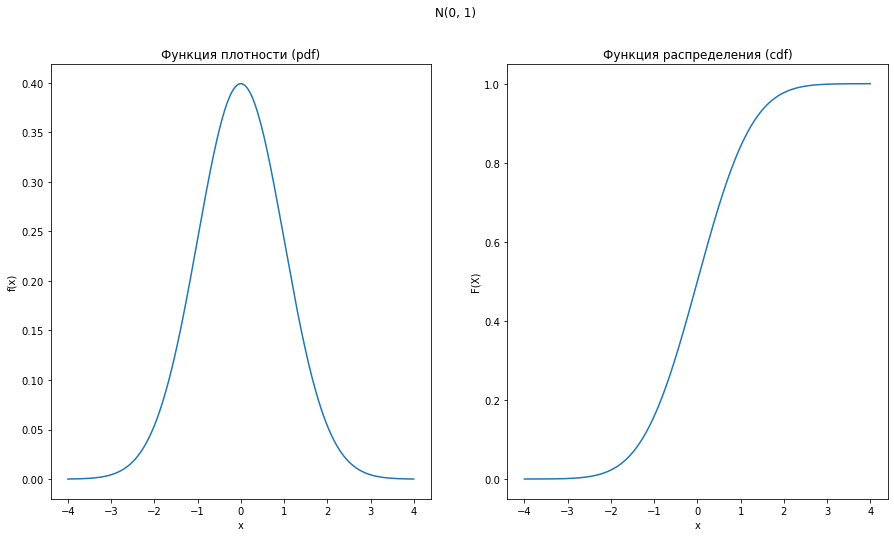

In [57]:
# Я сделаю немного не логичную вещь, но зато весьма наглядную
# Давайте нарисуем графики функций распределения и плотности стандартного нормального распределения

n_sample = 5000 # говорим, сколько будет наблюдений
np.random.seed(123) # ставим число 123, чтобы другой человек мог воспроизвести результат
x = np.linspace(-4, 4, n_sample) # говорим, что те 5000 наблюдений равномерно легли в интервале от -4 до 4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8)) # Представьте себе, что fig это одна большая ячейка, 
# а ax1, ax2 две подячейки с непосредственно графиками

fig.suptitle('N(0, 1)') # общее название двух графиков

ax1.set_title('Функция плотности (pdf)') # индивидуальное название первого графика
ax1.set_xlabel('x') # название оси x
ax1.set_ylabel('f(x)') # название оси y
ax1.plot(x, stats.norm.pdf(x)) # собственно, то, что мы и рисуем: по оси х - наши 5000 наблюдений равномерно "размазанных"
# от -4 до 4, по оси y - значение функции плотности (по умолчанию, функция плотности считается для стандартного 
# нормального распределения), которую я написал ранее

# Аналогично первому графику
ax2.set_title('Функция распределения (cdf)')
ax2.set_xlabel('x')
ax2.set_ylabel('F(X)')
ax2.plot(x, stats.norm.cdf(x))

plt.show()

- Теперь, видя перед глазами графики, нам будет легче понимать, что вообще происходит (наверное)
- Допустим, мы хотим понять, чему равна функция распределения в точке x = 0
- Например, нам это может быть необходимо, если мы знаем, что наша случайная величина (пусть, доходность акции) распределена стандартно нормально (пожалуйста, никогда не используйте стандартное нормально распределение для доходностей) мы хотим понять, чему равна вероятность того, что наша доходность будет равна или меньше 0.
- Напоминаю определение функции распределения: $F(X) = P(X \leq x)$

In [3]:
# Для этого мы вызываем следующую функцию 
stats.norm.cdf(0)

0.5

- Как и ожидалось, вероятность такого события оказалась равна 50%

In [4]:
# Аналогично, если мы уже знаем вероятность, то, для того чтобы найти значение x, которое соответствует этой вероятности
# мы используем следующую функцию
stats.norm.ppf(0.5)

0.0

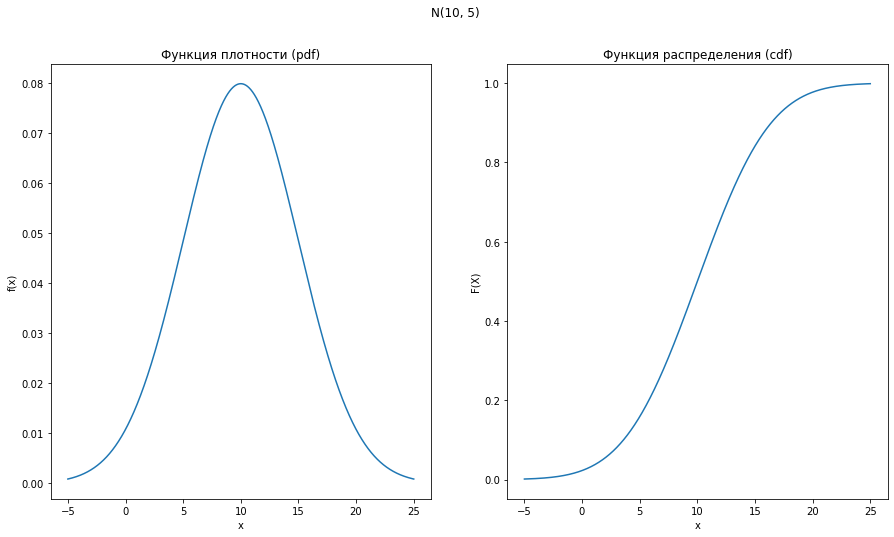

In [5]:
# Естественно, мы можем поиграться с параметрам нормального распределения

n_sample = 5000 
np.random.seed(123) 
x = np.linspace(-5, 25, n_sample) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8)) 

# loc - математическое ожидание распределения 
# scale - стандартное отклонение

loc = 10
scale = 5

fig.suptitle('N({}, {})'.format(loc, scale)) 

ax1.set_title('Функция плотности (pdf)') 
ax1.set_xlabel('x') 
ax1.set_ylabel('f(x)') 
ax1.plot(x, stats.norm.pdf(x, loc = loc, scale = scale)) 

ax2.set_title('Функция распределения (cdf)')
ax2.set_xlabel('x')
ax2.set_ylabel('F(X)')
ax2.plot(x, stats.norm.cdf(x, loc = loc, scale = scale))

plt.show()

- Давайте вернемся к примеру с шоколадкой
- Мы выяснили, что нам нужно посчитать $1 - \Phi(2.5)$

In [6]:
print('''Вероятность того, что вес шоколадного батончика, который подчиняется нормальному закону распределения со средним 
50 грамм и стандартным отклонением 2 грамм, превысит 55 грамм, равна {:.4f}'''.format(1 - stats.norm.cdf(2.5)))

Вероятность того, что вес шоколадного батончика, который подчиняется нормальному закону распределения со средним 
50 грамм и стандартным отклонением 2 грамм, превысит 55 грамм, равна 0.0062


### Хи-квадрат распределение

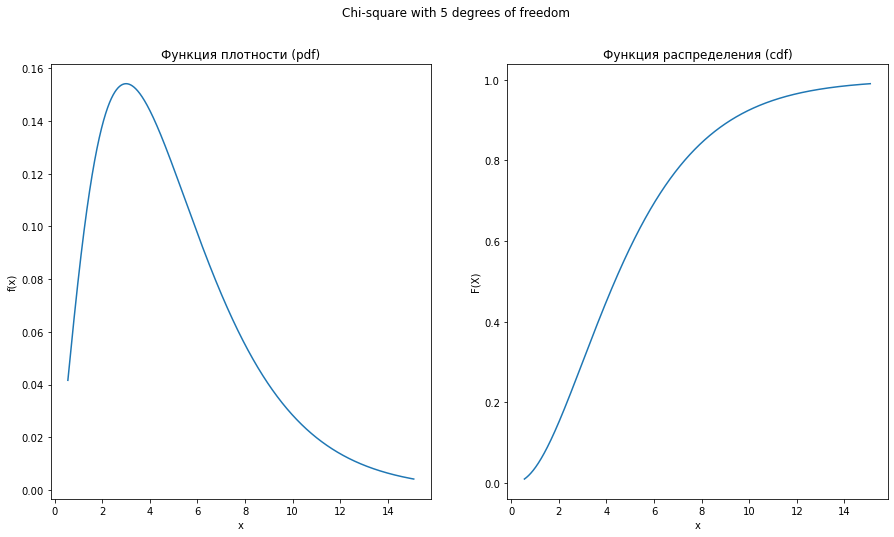

In [58]:
# Давайте теперь нарисуем хи-квадрат распределение

n_sample = 5000 
np.random.seed(123) 

# Для хи-квадрат распределения нам нужны степени свободы

df = 5

# Ок, по-хорошему, на этапе определения границ наблюдений стоит ставить квантили рассматриваемых распределений
# То есть:
x = np.linspace(stats.chi2.ppf(0.01, df=df), stats.chi2.ppf(0.99, df=df), n_sample) 

# Теперь мы избежим проблемы, что распределение может криво нарисоваться

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8)) 

fig.suptitle('Сhi-square with {} degrees of freedom'.format(df)) 

ax1.set_title('Функция плотности (pdf)') 
ax1.set_xlabel('x') 
ax1.set_ylabel('f(x)') 
ax1.plot(x, stats.chi2.pdf(x, df)) 

ax2.set_title('Функция распределения (cdf)')
ax2.set_xlabel('x')
ax2.set_ylabel('F(X)')
ax2.plot(x, stats.chi2.cdf(x, df=df))

plt.show()

- Мы с вами на будем применять это распределения для проверки гипотез о статистической значимости... многих вещей :) 
- Вообще, это распределение используется для проверки нулевой гипотезы о подчинении наблюдаемой случайной величины определенному теоретическому закону распределения
- Давайте на примере

- Пример из иммунологии.
- Представим, что мы выполнили эксперимент по установлению эффективности подавления развития микробного заболевания при введении в организм соответствующих антител. 
    - Всего в эксперименте было задействовано 111 мышей, которых мы разделили на две группы, включающие 57 и 54 животных соответственно. 
    - Первой группе мышей сделали инъекции патогенных бактерий с последующим введением сыворотки крови, содержащей антитела против этих бактерий. 
    - Животные из второй группы служили контролем – им сделали только бактериальные инъекции. 
- После некоторого времени инкубации оказалось, что 38 мышей погибли, а 73 выжили. 
    - Из погибших 13 принадлежали первой группе, а 25 – ко второй (контрольной). 
- Проверяемую в этом эксперименте нулевую гипотезу можно сформулировать так: введение сыворотки с антителами не оказывает никакого влияния на выживаемость мышей. Иными словами, мы утверждаем, что наблюдаемые различия в выживаемости мышей (77.2% в первой группе против 53.7% во второй группе) совершенно случайны и не связаны с действием антител.

|Группа|Погибло|Выжило|Всего|
|---|---|---|---|
|Бактерии + Сыворотка| 13 | 44 | **57**|
|Бактерии| 25| 29 | **54**|
|**Всего**|**38**|**73**|**111**|

- Для того чтобы проверить эту нулевую гипотезу, нам нужны *ожидаемые* значения.
- Вего погибло 38 мышей из 111, т.е. 34.2%.
- Если мы с вами считаем, что эти две группы статистически не отличаются, т.е. антитела не работают, то в них обеих должна быть смертность 34.2% и таблица должна выглядеть вот так:  

|Группа|Погибло|Выжило|Всего|
|---|---|---|---|
|Бактерии + Сыворотка| 19.5 | 37.5 | **57**|
|Бактерии| 18.5| 35.5 | **54**|
|**Всего**|**38**|**73**|**111**|

- Для такого случая есть формула расчета [критерия Хи-квадрат Пирсона](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test):
$\chi^2 = \sum_{j=1}^{k} \frac{(X_j - E_j)^2}{E_j}$, где $X_j$ - это фактическое значение, а $E_j$ - ожидаемое значение
- В рамках этой задачи получаем: $\chi^2 = \frac{(13-19.5)^2}{19.5} + \frac{(25 - 18.5)^2}{18.5} + \frac{(44-37.5)^2}{37.5} + \frac{(29-35.5)^2}{35.5} = 6.79$
- Для того, чтобы отвергнуть или не отвергнуть нулевую гипотезу нам не хватате только степеней свободы. Так как у нас всего две категории ("Бактерии" и "Бактерии + Сыворотка"), то количество степеней свободы равно $2-1 = 1$

In [9]:
print('Значение Хи-квадрта распределения с 1 степенью свободы для 5% уровня значимости равно {:.2f}'.\
      format(stats.chi2.ppf(0.95, df=1)))

Значение Хи-квадрта распределения с 1 степенью свободы для 5% уровня значимости равно 3.84


- Видим, что рассчитанное значение превышает теоритическое. Значит, мы отвергаем нулевую гипотезу о том, что антитела работают

- Тем не менее, есть небольшая проблема с подобным тестом.
- Он рассчитан на случай непрерывного распределения.
- Поэтому зачастую используют такую вещь, как [поправка Йетса](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity): $\chi^2 = \sum_{j=1}^{k} \frac{(|X_j - E_j| - 0.5)^2}{E_j}$
- Не будем вручную пересчитывать, а воспользуемся пакетом `stats`

In [10]:
obs = np.array([[13, 44], [25, 29]])
chi2, pval, df, tmp = stats.chi2_contingency(obs, correction=True)
print('Получаем, что значение Хи-квадрат статистики с {} степенью свободы с поправкой Йетса равно {:.4f}, а p-value равно {:.4f}'.\
format(df, chi2, pval))

Получаем, что значение Хи-квадрат статистики с 1 степенью свободы с поправкой Йетса равно 5.7923, а p-value равно 0.0161


### Распределение Стьюдента

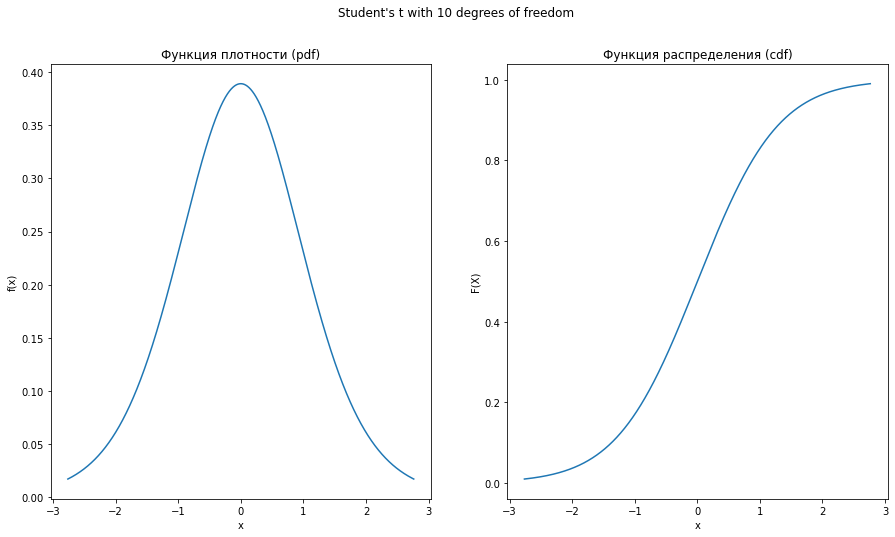

In [11]:
# Давайте теперь нарисуем распределение Стьюдента

n_sample = 5000 
np.random.seed(123) 

# Для распределения Стьюдента нам нужны степени свободы

df = 10

# Ок, по-хорошему, на этапе определения границ наблюдений стоит ставить квантили рассматриваемых распределений
# То есть:
x = np.linspace(stats.t.ppf(0.01, df=df), stats.t.ppf(0.99, df=df), n_sample) 

# Теперь мы избежим проблемы, что распределение может криво нарисоваться

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8)) 

fig.suptitle('Student\'s t with {} degrees of freedom'.format(df)) 

ax1.set_title('Функция плотности (pdf)') 
ax1.set_xlabel('x') 
ax1.set_ylabel('f(x)') 
ax1.plot(x, stats.t.pdf(x, df)) 

ax2.set_title('Функция распределения (cdf)')
ax2.set_xlabel('x')
ax2.set_ylabel('F(X)')
ax2.plot(x, stats.t.cdf(x, df=df))

plt.show()

### Распределение Фишера

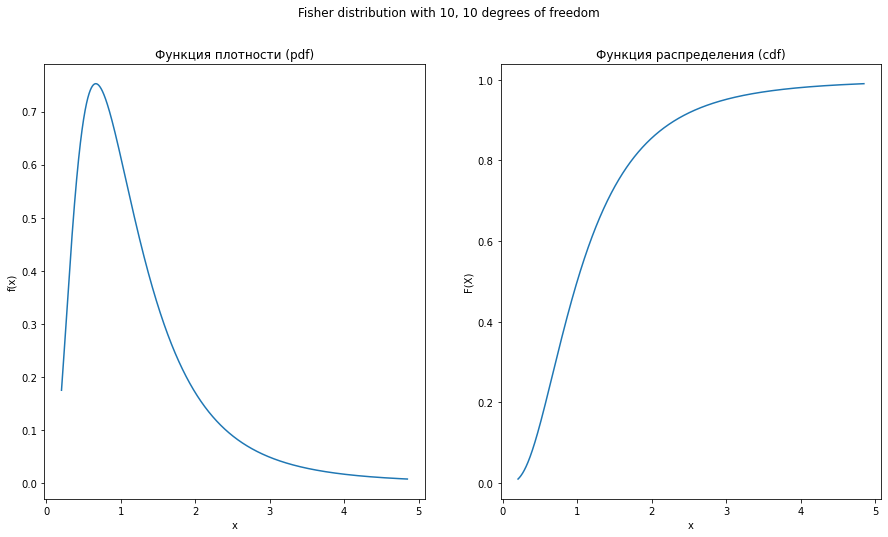

In [12]:
# Давайте теперь нарисуем распределение Фишера

n_sample = 5000 
np.random.seed(123) 

# Для распределения Фишера нам нужны степени свободы

dfn = 10
dfd = 10

# Ок, по-хорошему, на этапе определения границ наблюдений стоит ставить квантили рассматриваемых распределений
# То есть:
x = np.linspace(stats.f.ppf(0.01, dfn=dfn, dfd=dfd), stats.f.ppf(0.99, dfn=dfn, dfd=dfd), n_sample) 

# Теперь мы избежим проблемы, что распределение может криво нарисоваться

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8)) 

fig.suptitle('Fisher distribution with {}, {} degrees of freedom'.format(dfn, dfd)) 

ax1.set_title('Функция плотности (pdf)') 
ax1.set_xlabel('x') 
ax1.set_ylabel('f(x)') 
ax1.plot(x, stats.f.pdf(x, dfn=dfn, dfd=dfd)) 

ax2.set_title('Функция распределения (cdf)')
ax2.set_xlabel('x')
ax2.set_ylabel('F(X)')
ax2.plot(x, stats.f.cdf(x, dfn=dfn, dfd=dfd))

plt.show()

## Операции с матрицами

- Нам с вами в рамках этого курса, да и не только этого, очень пригодятся матричные операции и линейная алгебра
- Откровенно говоря, все, что вам нужно уметь в рамках этого курса, это перемножать матрицы, транспонировать матрицы и находить обратную матрицу. Плюс, знать про такую концепцию как [бродкастинг (broadcasting)](https://numpy.org/doc/stable/user/basics.broadcasting.html) и на [русском](https://tirinox.ru/numpy-broadcasting/)

In [59]:
# Давайте создадим такую матрицу 4 x 2
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

In [60]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [15]:
X.shape

(4, 2)

In [16]:
# Давайте попробуем ее на что-нибудь умножить
X * 2

array([[2, 2],
       [2, 4],
       [4, 4],
       [4, 6]])

- Ок, мы видим, что обычное умножение означает поэлементное умножение, т.е. каждый элемент был умножен на 2. 
- Аналогичная картина и при использовании других операций: делений, сложение, вычитание
- И все же, а что если нам нужно умножить матрицу на вектор\другую матрицу
- Наши знания азов линейной алгебры говорят нам, что матрицу 4x2 можно умножить на любую матрицу размерности 2xN
- Давайте попробуем

In [62]:
a = np.array([[1, 2], [2, 4]])
a

array([[1, 2],
       [2, 4]])

In [18]:
a.shape

(2, 2)

In [19]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [20]:
a

array([[1, 2],
       [2, 4]])

In [63]:
X @ a

array([[ 3,  6],
       [ 5, 10],
       [ 6, 12],
       [ 8, 16]])

In [21]:
Z = np.dot(X, a)
Z

array([[ 3,  6],
       [ 5, 10],
       [ 6, 12],
       [ 8, 16]])

In [22]:
Z.shape

(4, 2)

- Действительно, мы молодцы и правильно помним, как умножать матрицы.
- Однако, почему-то я упомянул бродкастинг
- Давайте посмотрим на следующий пример

In [23]:
b = np.array([1, 2, 2, 4])
b

array([1, 2, 2, 4])

In [24]:
b.shape

(4,)

In [25]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [26]:
np.array([1, 2])

array([1, 2])

In [27]:
np.array([1, 2]).shape

(2,)

In [28]:
Y = np.dot(X, np.array([1, 2]))
Y

array([3, 5, 6, 8])

In [29]:
Y.shape

(4,)

- Хм, результат тот же самый, но у нас нет кол-ва столбцов в векторах b и Y
- Собственно, вот в чем разница

In [30]:
Z.shape

(4, 2)

In [31]:
Z.T

array([[ 3,  5,  6,  8],
       [ 6, 10, 12, 16]])

In [32]:
Z.shape == Z.T.shape

False

In [33]:
Y.shape

(4,)

In [34]:
Y.shape == Y.T.shape

True

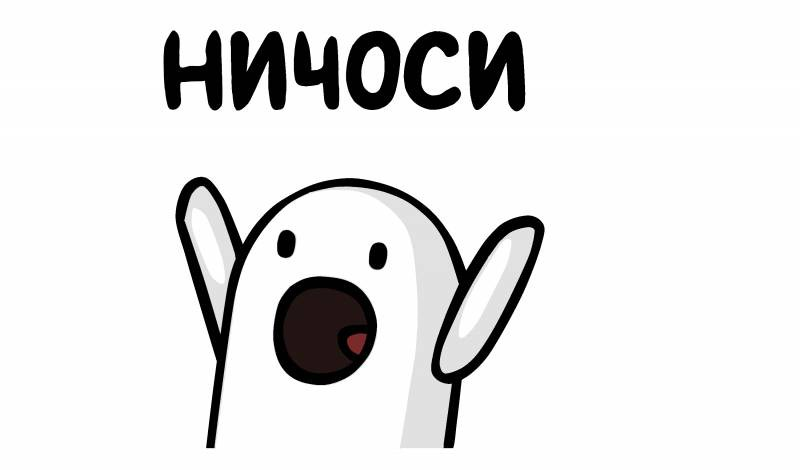

- На практике
- Мы взяли и умножили матрицу Z на следующую матрицу

In [35]:
c = np.array([2, 4])
c

array([2, 4])

In [36]:
c.shape

(2,)

- Вот мы взяли и забыли, что матрица размерность 1x2, но при этом мы ее создали так, как выше
- По идее матрица 4x2 не может быть умножена на матрицу 1х2

In [37]:
Z

array([[ 3,  6],
       [ 5, 10],
       [ 6, 12],
       [ 8, 16]])

In [38]:
np.dot(Z, c)

array([30, 50, 60, 80])

- Умножение произошло потому что матрица c была "перевернута" в матрицу 2х1, чтобы перемножение матриц произошло
- Для того чтобы такого не происходило, надо в явном виде прописывать размерность матриц

In [39]:
c = c.reshape([1, 2])

In [40]:
c.shape

(1, 2)

In [41]:
np.dot(Z, c)

ValueError: shapes (4,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [42]:
# Ну или с самого начала создавать со всеми измерениями
d = np.array([[2, 4]])

In [43]:
d.shape

(1, 2)

In [44]:
np.dot(Z, d)

ValueError: shapes (4,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

- Как вы думаете, всегда ли `NumPy` будет перемножать вектора у которых нет жесткой спецификации размерности?
- Попробуйте перемножить матрицу Y и c

In [65]:
Y.shape

(1000,)

In [66]:
c = np.array([1, 2])
np.dot(Y, c)

ValueError: shapes (1000,) and (2,) not aligned: 1000 (dim 0) != 2 (dim 0)

- Наконец, по поводу обращения матриц
- Я не буду особо погружать вас в теорию
- Простое определение обратной матрицы звучит так:
    - Матрица $A^{-1}$ называется обратной матрицей, если $A \cdot A^{-1} = E$, где $E$ - матрица, у которой на диагонали стоят единицы (единичная матрица). Обратная матрица существует только у квадратных матриц (2х2, 3х3 и т.п.)
- Это все нам с вами (и не только нам) нужно, чтобы решать линейные уравнения

- Вспомним системы линейных уравнений и школу:
    - В школьной столовой есть сосиски в тесте и компот
    - Школьники потребляют некое количество обоих продуктов
    - Выручка столовой составляет 2000 ед.
    - Цена одной сосиски в тесте составляет 30 ед., а компота 10 ед.
    - Также, известно, что сосисок в тесте было продано на 50 ед. больше, чем компотов
    - Надо найти количество проданных сосисок в тесте и компотов
- Собственно выглядит это все вот так:
$$\begin{cases}
30 \cdot x + 10 \cdot y = 2000 \\
x - y = 50 \\
\end{cases}$$
- С другой стороны, это можно записать как:
$$ AX = b, \text{ где }$$  
$$
A = \begin{pmatrix}
30 & 10 \\
1 & -1
\end{pmatrix}, X = \begin{pmatrix}
x \\
y \\
\end{pmatrix}, b = \begin{pmatrix}
2000 \\
50 \\
\end{pmatrix}$$  
- Понятно, что мы можем с вами решать эту систему линейных уравнений всевозможными способами, но в дальнейшем было бы неплохо не бояться оборачивать матрицы (особенно, учитывая, что вам нужна всего лишь строчка кода).
- Собственно, если вы помните, мы можем выразить матрицу $X$ как:
$$X = A^{-1}b$$

- Найти обратную матрицу A можно самим. Она квадртаная 2х2, поэтому давайте проделаем это руками. Все же помнят, да?

$$A^{-1} = \begin{pmatrix}
0.025 & 0.25 \\
0.025 & -0.75 \\
\end{pmatrix} $$

- А теперь сделаем это с помощью `NumPy`

In [46]:
A = np.array([[30, 10], [1, -1]])

In [47]:
A.shape

(2, 2)

In [48]:
A1 = np.linalg.inv(A)

In [49]:
A1

array([[ 0.025,  0.25 ],
       [ 0.025, -0.75 ]])

In [50]:
b = np.array([[2000], [50]])

In [51]:
np.dot(A1, b)

array([[62.5],
       [12.5]])

##### Немного практики

In [67]:
np.random.seed(1)

In [68]:
X = np.random.normal(loc = 0, scale = 1, size = 1000)
eps = np.random.normal(loc = 0, scale = 2, size = 1000)
Y = 100 + 20 * X + eps

- Есть матрицы $X$ и $Y$. Нам с вами нужно посчитать:
    - $(X'X)^{-1}$
    - $X'Y$